We follow along with lesson 1.

In [1]:
%matplotlib inline

In [2]:
path = "data/dogscats/"

In [3]:
from __future__ import division, print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth = 100)
from matplotlib import pyplot as plt

In [4]:
import utils; reload(utils)
from utils import plots

Using Theano backend.


In [7]:
batch_size = 32
from vgg16 import Vgg16
vgg = Vgg16()

/home/ubuntu/anaconda2/lib/python2.7/site-packages/keras/layers/core.py:621: UserWarning: `output_shape` argument not specified for layer lambda_1 and cannot be automatically inferred with the Theano backend. Defaulting to output shape `(None, 3, 224, 224)` (same as input shape). If the expected output shape is different, specify it via the `output_shape` argument.
  .format(self.name, input_shape))


In [8]:
batches = vgg.get_batches(path + 'train', batch_size =4)

Found 23000 images belonging to 2 classes.


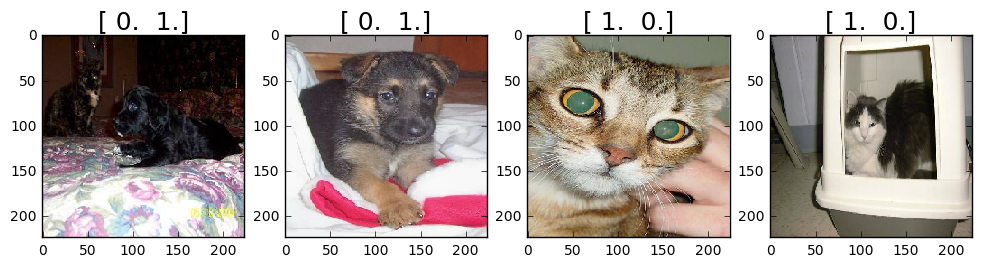

In [9]:
imgs, labels = next(batches)
plots(imgs, titles = labels)

In [10]:
vgg.predict(imgs, True)

(array([ 0.8826,  0.4814,  0.8009,  0.5279], dtype=float32),
 array([219, 235, 281, 435]),
 [u'cocker_spaniel', u'German_shepherd', u'tabby', u'bathtub'])

Great. We can now proceed with finetuning this model. Maybe even on a t2.large instance. Let's see if that works.
# Finetuning

In [16]:
batch_size = 32
batches = vgg.get_batches(path + 'train', batch_size=batch_size)
val_batches = vgg.get_batches(path + 'valid', batch_size=batch_size)


Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [17]:
vgg.finetune(batches)

In [ ]:
vgg.fit(batches, val_batches, nb_epoch = 1)

Epoch 1/1


Apparently, this takes a lot of time on a t2.large instance. Started at 10:14.

We should really switch to a p2.large instance, for now.